In [1]:
import warnings
warnings.filterwarnings("ignore")

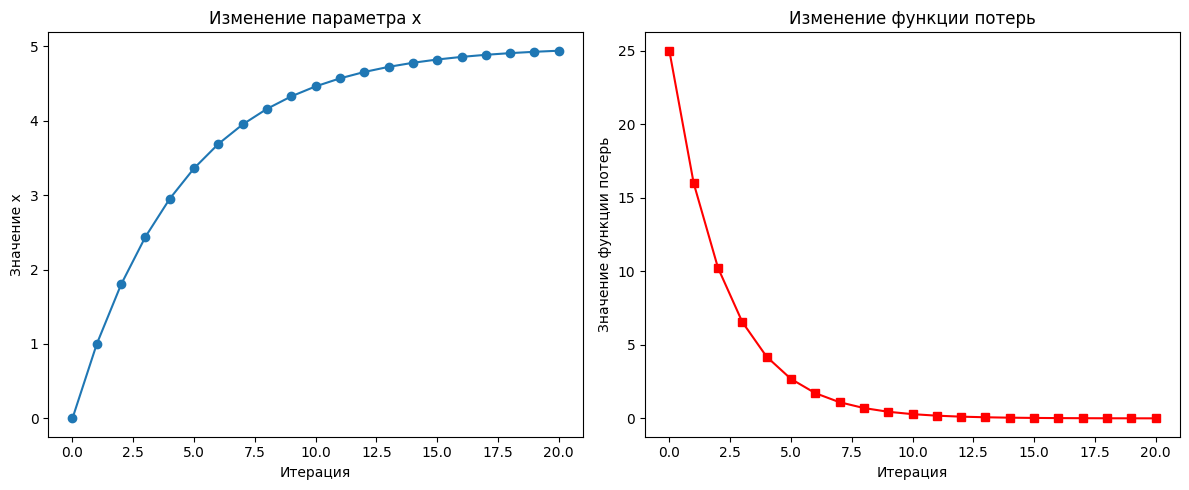

In [2]:
import matplotlib.pyplot as plt


# Функция потерь и ее производная
def loss_function(x):
    return (x - 5) ** 2


def derivative_loss_function(x):
    return 2 * (x - 5)


# Параметры градиентного спуска
learning_rate = 0.1
initial_guess = 0

# Инициализация переменных для хранения истории обновлений
x_updates = [initial_guess]
loss_updates = [loss_function(initial_guess)]

# Цикл градиентного спуска
x = initial_guess
for i in range(20):
    grad = derivative_loss_function(x)
    x = x - learning_rate * grad
    x_updates.append(x)
    loss_updates.append(loss_function(x))

# Визуализация
plt.figure(figsize=(12, 5))

# График изменения параметра x
plt.subplot(1, 2, 1)
plt.plot(x_updates, "o-")
plt.title("Изменение параметра x")
plt.xlabel("Итерация")
plt.ylabel("Значение x")

# График изменения значения функции потерь
plt.subplot(1, 2, 2)
plt.plot(loss_updates, "r-s")
plt.title("Изменение функции потерь")
plt.xlabel("Итерация")
plt.ylabel("Значение функции потерь")

plt.tight_layout()
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


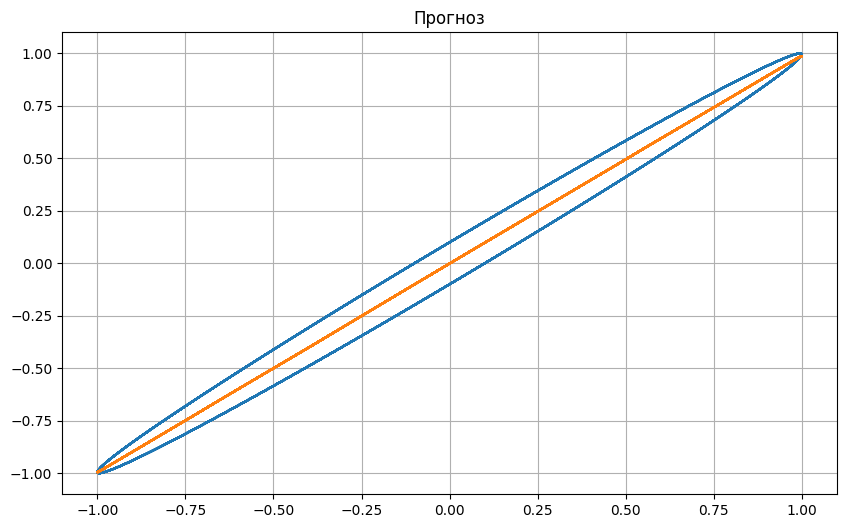

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Пример генерации искусственных данных временных рядов
data = np.sin(np.linspace(0, 100, 1000))
X = np.expand_dims(data[:-1], axis=-1)
Y = data[1:]

# Создание модели LSTM
model = Sequential([LSTM(50, activation="relu", input_shape=(1, 1)), Dense(1)])

model.compile(optimizer="adam", loss="mse")

# Обучение модели
model.fit(X, Y, epochs=200, verbose=0)

# Прогнозирование
predicted = model.predict(X)

plt.figure(figsize=(10, 6))
plt.plot(X, Y)
plt.plot(X, predicted)
plt.title("Прогноз")
plt.grid(True)
plt.show()


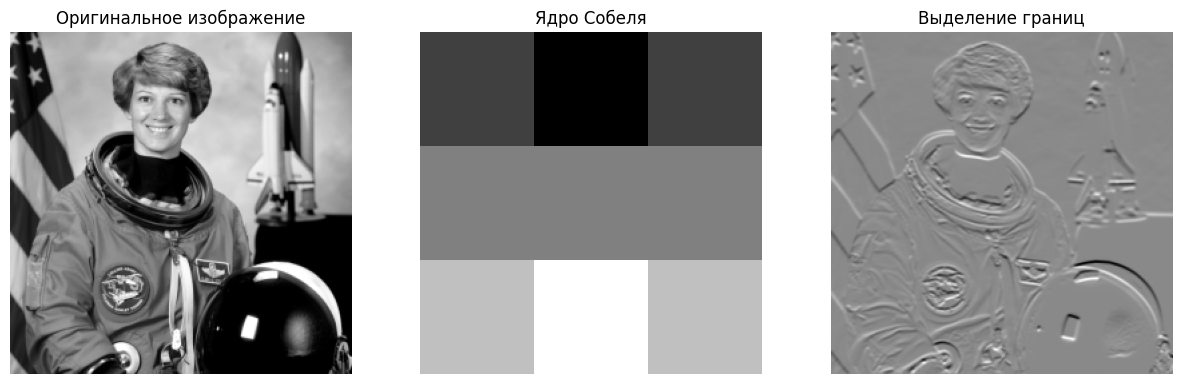

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import data, color
from skimage.transform import rescale

# Загрузка изображения и преобразование в полутоновое
image = color.rgb2gray(data.astronaut())
image_rescaled = rescale(image, 0.5, anti_aliasing=True)

# Определение ядра свертки (пример: оператор Собеля для выделения границ)
kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# Применение свертки
edges = signal.convolve2d(image_rescaled, kernel, boundary="symm", mode="same")

# Визуализация результатов
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Оригинальное изображение
ax[0].imshow(image_rescaled, cmap="gray")
ax[0].axis("off")
ax[0].set_title("Оригинальное изображение")

# Ядро свертки
ax[1].imshow(kernel, cmap="gray")
ax[1].axis("off")
ax[1].set_title("Ядро Собеля")

# Изображение после применения свертки
ax[2].imshow(edges, cmap="gray")
ax[2].axis("off")
ax[2].set_title("Выделение границ")

plt.show()


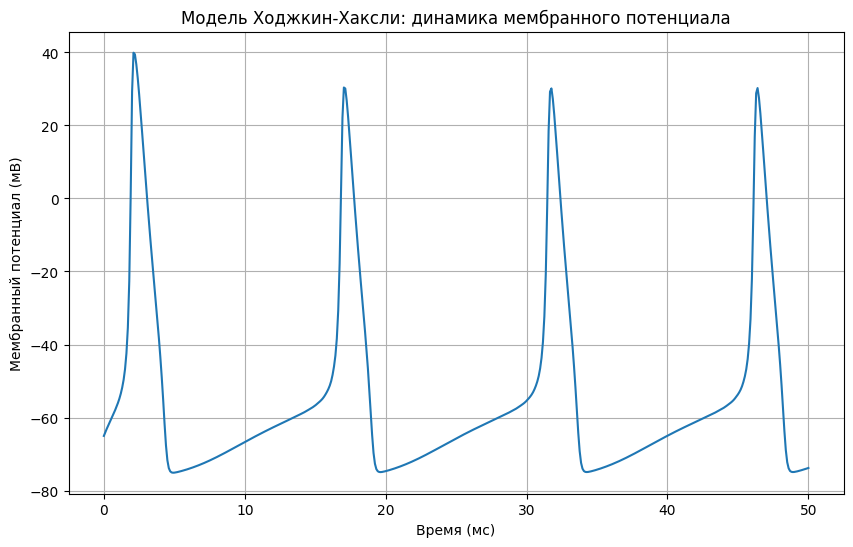

In [5]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


# Определение уравнений для модели Ходжкин-Хаксли
def hodgkin_huxley(t, y):
    V, n, m, h = y
    G_Na = 120
    G_K = 36
    G_L = 0.3
    E_Na = 50
    E_K = -77
    E_L = -54.387

    # Активационные и инактивационные функции
    alpha_n = (0.01 * (V + 55)) / (1 - np.exp(-0.1 * (V + 55)))
    beta_n = 0.125 * np.exp(-(V + 65) / 80)
    alpha_m = (0.1 * (V + 40)) / (1 - np.exp(-0.1 * (V + 40)))
    beta_m = 4 * np.exp(-(V + 65) / 18)
    alpha_h = 0.07 * np.exp(-(V + 65) / 20)
    beta_h = 1 / (1 + np.exp(-0.1 * (V + 35)))

    dVdt = (
        -G_Na * m**3 * h * (V - E_Na) - G_K * n**4 * (V - E_K) - G_L * (V - E_L) + 10
    ) / 1
    dndt = alpha_n * (1 - n) - beta_n * n
    dmdt = alpha_m * (1 - m) - beta_m * m
    dhdt = alpha_h * (1 - h) - beta_h * h

    return [dVdt, dndt, dmdt, dhdt]


# Начальные условия [V, n, m, h]
y0 = [-65, 0.3176769140606974, 0.05293248525724958, 0.5961207535084603]

# Интегрирование системы
t_span = (0, 50)
t_eval = np.linspace(*t_span, 500)

sol = solve_ivp(hodgkin_huxley, t_span, y0, t_eval=t_eval)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0])
plt.title("Модель Ходжкин-Хаксли: динамика мембранного потенциала")
plt.xlabel("Время (мс)")
plt.ylabel("Мембранный потенциал (мВ)")
plt.grid(True)
plt.show()


<img src="data:image/com/drive-viewer/AFGJ81rdaGpkkB_Qy64dqeSGXskRB2JifOXG6lrV9-7a7Eik4lF_skweZkAgdk9w-wLmHSK4nejHsvGTv7glUHzmx_vGIMx_=s1600;base64,iVBORw0KGgoAAAANSUhEUgAABPQAAAGnCAMAAAFwQsk1AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAE4UExURQAAAAAAAKvD2AAAAI6hsphuUpOounaGlFxDMQAAAF5rdwAAAAAAAAAAAAAAAEUyJQgGBEdRWgAAAJBpTiovNAAAAC82PBIUFgAAAAAAAC4hGQAAAAAAAPSxg4KUo7eFYgAAAGp5hQAAAAAAAAAAAN2gdwAAAKB0ViYcFQAAAL3X7gAAAB4iJaW80AAAAIiaq4ljSQAAAAYHBw8LCHB/jU04KQAAANWbcwAAAAAAAFllcAAAAHNTPjYnHUFKUr6KZgAAAIFeRSQoLQAAAAwNDwAAALHK3x8WEAAAAKd5WpmvwQAAAOWme3yNnGtOOgAAAGRyfgAAAAAAAM6VbgAAAFQ9LRcRDE1YYQAAALfQ5zU9QwAAABgbHp+1yXpYQT0sIQAAAMaQalNeaWRINeyrfztDS69/XgAAAOWlSKYAAABodFJOUwCw/wj//////xD/wBjbh////yD//4///yiX/4Qw////n/84+6f/QP//r/9I//+3//9Q/////7//WMf/YP/////P//9o/9f//3D//9////94/+eA/+////+I///3//////////////+oPM6o/gAAAAlwSFlzAAAXEQAAFxEByibzPwAAUDRJREFUeF7tnQtj3MaR5+dCJw59Oq3NLBXJR8WyTuGuqI0SOWtaivLgRpYtm95oyeU6Z9NxOomz9/2/wdXjD6ABNB6D7hn0zNRP4qC6UKgp1NQUHoPBLIwkOAehRlA5lRhnLrz0K0yTBFr6WN4ZLRFcqFSWgXZyb/BpH1xBWBr2HI7PLfbuFTKmHdDsoQAXi9NhE4asnkBkZKHwkm5PEuPI8TlUHQw+8x6bXMFZL43ZOuxc5gGmA/ExNzDtpHqS55h2UVlC6owvEzKP717e8d0L9+dcoOy142ONe1QI8kB/TdzdFh2uSqEcNXABZAa/uO0FxI08lELbaIn45KEULuihgTtpIa6k9kSq4W4WvuihFJosGR89dLtCUB5spW+Ntr36ul8I8oBZHuPiKxbud4WgPMgK79y2vbhhfSU8CFghKI+AES8sVSR/8vAS8yrC8dF/makTD+deI6xrnohpwApBeYRcYWFxVY4adNWfEDDXfweFoJMmGp/7i/uwjDRg9BQLy4QDlFGDvvh4oSbqRCee7wYakvwDmOEjCz/WCUaY4yMh/fXE0T9QxEczIfm451VYKrSp4vv07i9EDuQPC8OVTKD30ag4OvqHAeaEF2A97WLxA/9R7bTR+H549z+9/GGWz4tyDSW+sCsNif7d+uTkxzrQGbJsAJ6hcwuhRRlVRaerZ+pKHqD2KV9V4mc6ETMxDi2AOfRQCi2WiQ+u5EG1Nfz4bt2SSbEQPfJDi3J+ZdhgbHyXlSt6CLuSkGpUpqEFoOWHUmgyNj5Z+KW4kgdWNeiIDzN10uC0eCiFycgT8EN3fAEwK7xARgQLIh/cVdbxOT4uzRcKL+f4OLyM45Pw8o1Pw0sU3wrWEme9Ij27I53I4ypAv47gaPFwdfHF9mdstJ6sKMKO/dMlcUcXcdvoLii4VOu9ivj0tckWCS3f+DSybONDYGgSWaDxSFglmJUFFM5l4wWN7X+p0UNlDCR7kDJiH1PJXobxlXDyMo5PXtt848ux9DwyDy/rN8bGkHsJBuNLGfQTPT6ZArZ4Le5gmpSnmI6GYut4B0OL47s+XmPayejrQJrbMQ4tGN4e/YneLY4vedqHW1xDClM+A017Lz6gee4MMiHLBcMr1yM4tw5Z9B90qLNjja3v5WCz6vn0qXsCCHwEGqY/e8Lz2zLpfjKlGd2Y/MyJhRdBljvNJe6qHZ4o+KF+XUSTwGcemFMx1lUb1V8F7EVTuiqFJqPC4zf/CFf4HMZD1NSF2vbqih484abMqTEqPPFwWAiFzybh8PR8c8vec+VfFNFkfHjDrhCTBymlg7fNq+sX+OXo9omYPDCnQi5+GOEKMXkgOlmmjroqr4TYo4lz7S3vuLeGRFRcXaGuMM+jo/aYrvD0H66I4IcmEp77b+9ig67w9F/hii8UaNAbXovy4oXSNf9vIRG9e/d3MhUww2PhTuEDk7ArieidEy/MKjpIPuoIPm902CAmivA3kDGnhrgqLq3Y73CFmIjP3/ieTDGDV6cNu5I5uBwiaMMB8Uv7X+XFEJhTo3K13+1KAuP0vcnTMjws2QJXLpCkQsimzB7RFx5fBDXkSiJSvtaJqPkvZA9XEA7CPjUkH8ypM8aVhsTcwoUQrJVZIXv4K4WQzTLhDbmSiGroIh32i3NxxZIIIZulw+txhZg8FrgIPByeHD7IIYQIUZ9gjAivDeZ0hZcJeV+jS9FlHB7tm2QcXrHnlCdyAWy24Ul02Yan0aUKb1UrGRveipOvTToK/sBuRYj3GJycXbziE2Tp0ZWPxtGRxAqg2JKEtxo4tHzDk8iyDU8Dyye8IhCdIi5+c2QDB3Rcyxdm5AHF85D+vCaV3YvbTB6kjCi/demOcgyvwB1l9OK24Est8w0PF4JmikVnZAE2KcYEOHdLZK9lmUvi23GsPjJJ3BLZE2vIAp9zj+Xi4mwR/YUht3jlaoeMTi9hmAp/Aa8/L0jbMtm7U9z9A8SutMBODlWciqvvaROxkfHyPXdhKZM2PntXtBcmAudQXmkaHuyPuhNID/LxEc63T8QtTnVP9mKxuHGfpqcUongdfUlOg+L2K49C1395KVui9go4e35YcdkDUZ9RAP6kupYv/eh6OqHU1BK2dPYuCYhKSzETBxRHdfk40VIsCy3fuicOzt6CCbVnlFj2psOfrVn2pkG5uxqTvdIkJPDVuiKMfBX49RoBrKNZyZXYBOdu3Fo7hxhK46AwLlBcRjTAiOyVgTtXXoDQGd4QuCJpgNKZ5m6cfz8Y3aX3BZ1XCkMkzF4VVSlMjwoJ6gW+itx5T91DO5iwMOyJSJk93dMsnzksjNodXSJ7Ve7EP6RuOAbZpZM+2RD2CqEwGiBl9tSqfGYvKswrhSFGZ8/PnfiH1A2ZFMHQfz4Arws8jx9FGCJh9p7oE5bPLIJGxajwVOcNML72vNyJf0jdkMkDBKN/QYGvPWVpgJRbDeeeqdAKDwlVgY0GWHKrUUD+R8B2L/hhsbjWkSfsq6API0CCiE9/R3n6kP4wroBpP/r08tAMTy6nVYEfRoAEUYo+/vi3b7mfu7faCSVnPrIc5AE0DhH2WwK/wqP9IEEEi8VfPYUS2BCLxXN+QAylcIP+ZISo2HQYJIhwX9PfD+gP4wr2X0LLqP8xnIoxSx3CSD9e9j4j8d23KVUffUejevZgPYRzjzWGRngslcIIatnTv7/S3ycYAs9Z8RQj/ZMlGjAt0hAOSmmYzr43KXvkjv+L4IfHEl9VPz4qJOjk5NY79PfvJIjqDVzvLZTOCr+j/WtYPcJIPx3Ze489QCZGB/W6fOaaIFIpDNO11fggVHuV19H++U52hW1QGOmns/ZqjA6qeuazdjClMEhX9uqIM9/naP9EadsWbo/2kzp74ahUWiYqJKgXclb3ONo/U9qGhJF+yHAMsB7BzZ5gRjtaovZ8lgrUqEOHbZa9iXDuLHvTkNMFlr1J4FSLZW8C5Wkqy97SlLmz7C2NlzvL3rL4uZs9e/XrbB95twTaCGbOHj19caXy4ea9DTj62ZEr5Thzm5U9DR6DWdDMMRSGRJLiUrR1IImbOXttNiN7SFtu2cvlasBeyqRlV3v546XMsjeI/IRNSS1hlr02zZz4o9aVt0YYzQ/9r30VpEZhZVR4OWGB/g74VmktqhwbQW5QeiRDR/4v7gqUuSPL3ihaFxJx7uQRY2M8mjvL3hSK3BnLY7mbjuUuCsudYWw69/I/mZYv92x3bzqcvNHZu80X9WfJPBUgyRv/zC3L+rmuGWnF4W5AWB18TUFU9iLvepKMe62bf6z+ZZULMpbL3vP6mzdFjC/d4uww0hEt3liNWIdu8bTfhSRvmewdny3O8EVwEBmjwk5a586Wg1zUQ7kRF9kNdsc/+9KJJm+Z7KW/445ATtjPYx1Nwt1rbM+uWzcCWRIE1QWSt1T21OF1ucDjh/wyNd80y0JL3148idkAHZ1LZPRXOOHpsa9Ykqe0ZnLno/DyRfKWy57uWvMCxY2Uyr/JHLg9uXAqwonbK5amSRmZfCV8otfTY/zaWXD5MnnLZU/LTP64U7nTU8dPMtpDEOxcRDgpAtPI6O/SnV6UiinccXyP28D5eKZK3jLZKyhiLJkaY40ETqRcfD8jfi2vl3v1jaTiJW9q9mpkkr2bi8XZwt98iCKCvdsLvqFaHT95E7IXulcWxHlpXT/UUixJaPla8qbU3m7jJ8+yF4VlLwbLXgyWvQgoeZa9qXDyLHsTkeQNZ699h8JqKU8I7ZgHkOccBtb5wjGOibO0aQsklcKwI2HcTR2GnTn54WURAsGUQu9pugpyMgZYEzKoaToobdoCSc3bQg6RLnuBYEqheTfIIcbd1KFypo7HuPfj1JtBl0JtngpDrDR706NCgnqpnMHvGPdko0ZtoVq+Ug2QMHuN22TWgimF7ku2fZbLXuG/fJ4eyKY0bggs6U+fV6oBEmYvEEwp6I3/q3kDLJW99hP2UIbAgp6yLYT6PBGGWG32JkeFBPVSOZWpL3XDIYhVWxCpFIZdESmzJ6ffqmcOC+1zdAGWyF7hm/DETup3Zq0JIumnHYXREOmy17xFq0ilgKhgNMT47BXPwfhyF2SiVhyUe+kLJN0r5sFoiHTZwxNKMFBNjwoJ6oVdFc8l1AYdSAhsRo96h8BS0HmlMOyLDJGgXkZ4kies3eCWpM674A4xNnt4VcCYNSYTfVeycV3gR+de+0ZDJMye3KGVhKqz8P9CQFRqNMTo2sNuuDIye/InxnL/3VJgfeNuvUMkzJ4+YeOlnBgVEtRLy9P47OEBd5mFgHm+0RBV9r5wjtLEf/8ATckIR/qEB/qs+sz0UHQW/YMw4jeIJ2dvDLW7F3sCRrjXMRmNAAm6e/c9ShIl6tO732/VI0wHaNxcGcE0oyKjESBBJydvvuNO3I/dyY/bNzQU3x7UBEdRBCQPp5UgarnFN/+xfhgkiCH5I/p7912MS2A6gD5rKWA0LSokiHF8q9Z36A/jEvFWIcmDPAAbijG/Y0uhCA/CGLzsfUvy28Wtvn/qzVgie96tqSWG4P2rR4AEMSzT3zuUxDrirUQrD4MB9IuqiKoU5I8enqswBi9J7vuaOfn7xaeiU8Z640AkGHQWUZXCMlEhQcRPSP79jylXX9HfX/me1QU1b5S8Ja68JcMiafSmgKDhVffZHoGfvfLvbXoLT8keP20RjP7Rw6SokCDC/ZX+PqE/kt/QCfC9cfLI/Wj/jtsvCS9oUggIrxRGEMoeP0zNHm+qRLjWGCZGhQQRLOqfKMPZk+SR+7H+q7uhewLCG/srFoyXvRpTs4dgyq/AT4wKCSJu4e8bqsFa8rzsafL42XU8TBGnL+g+6eJZoRlB2uz5wfB/EaZEhQQ1qelLb0geP7mMR8CxiHF5a/fAPd6H6cgee4BITIhKOgsL06JCghrQZvdnEInCW5E8fgKZjkDeuiL1CMN01V6N8VHxM4txX3jDdGTvFgGRgLcyefwEKoygHVUpVDfwHyRx9vqiqu7bP0jXO7eGequSx88EaZgyqsuWsISf1WdvUlRIUC/izUveEv79XwzoEQZZWfb6whtkdPb85C3hn+gJ73y0n9TZ64uKGooKg4zNXi151RONoR1e4NcZhqBlxwDrEZTGpTAlKiSoF/bmJ696xjGcnuK2lqVAUlNYO+Uq3G8nbfTakZMxwLqgrTHGY9mLwbIXQeC9bIyFk2fZm4gkz7I3Dc6cZW8ikjjL3jQ0b5a9SSBtlr0pFFmz7E2gTJplb3mqnFn2lsZLmWVvWfyMWfaWpJawrLJ3lv8rea+Wr7xqL//sLX/l7SqpP/0GZK/G/NkrA3Cn17E371k3HP38SCT0f/X3u0wKNcEMkEgOJYGbhCQP8jyUz88T+duYFGrlYTAP5bOToKFsSvb4c/G5s1dySIFILBuSPU5e9c7Jhs3IniTPsjcNTV522duPvGfeekDyMqy9DaBInmVvAmXyLHvLUyXPsjeCeoq85Fn2QjS2WzfKbBF+8ix7IXBDjYIr7+5uteRx9owQRf7OHz6u1ZefPMteN/KzFQ+fU44kUyFgaTTBZdicud7sQTJKytxJ5i5eySSUJ8teAO/yf8qO3F0omD2uUYhGCOf2L+SOqh3Js+yNoSt5lr0RXLfzx5mz7E1EEmfZm4bmzbI3CaTNsjeFImuWvQlY0iKw5EVgyYvAkheBJS8GS55hGEZF5A94G8Y07tG+jO3OGGsHhWelZ6yXsvBWUXqDPl/R0852B7UsGUzZHt/Pd9xvnWWNFh5/c4OALh0jfvDlrPjdQkM4wu+a9bGKJrFuUHhy3oqANh3nwz+skksan+uPwLyYu6GM+C3dZ8Vvn87EfY3wyZjfu+qgLLyVlZ66dO5IRiEu9RfQ5ub+E6q9Z/ReoWjPoJuHImU931We9d16xj/tc7B4dL04HvvjxC28wuO1YVROx0O+evWqt7ZG/2D2yrnSX607mvN15e0EvU3lV806OZz5zVGU/p2JmaoV3qpKz7nLU2/X5Xb7gOJR/Ukfzvi6ayT3NYLL9MkYB6XsrEwTRfGyvQPghxa2WC3642uaqSdX7ty5hzweSaPwVlR6r/kIomhre25/0T6iKNLGP7R8dbi4mOkFZ2T1dS+KYjqdJ5KHji8wL55bctO8PRJ+ZpSm9BC0WDF3OMbFhbTeY94/Php/pNgqPF5bBoNUiMMDejyA5+pH+LHzdxvPWTz1eeoQxkNxvnQPMJit9CQRx/TaPCpenj3tKfqTnQyS99A9l2FpsTbO3fO9WvWUoQ0RKDxemsEgETf0+/F7p+XX5arS0+llCXZYZyy9BvOU3tHlC57sn3JfEYoX6gX2/w6QMELGlcX6OOVfJS55PHZvPVh4qym9Nii97gLb9dJrcl7c0eyg62iytJiJp5GFt5bSO3504dyL4+5I949vOnd2vN595iD6c4+rfysOgTDuYxhg2GK14DedB0+QdRbeurqesaNI5XXsGEjlWekZq+Je5x6plZ4xE1Z6xkxY6RmzoMcfVnrGmikKz0rPWCtV4aUoPe8sO/BPvCttTXCx/3ed9q2AdUwEnBqTKU71ySRBPtlL/bPktuO2pmuxuioS8ZgMOI2h7SbgeYxRWxOLeEwGnNYoCq94LtXG0HYjmgsMhLama7Gk+SR3dxORJjJewfrZLtY0PpgaYySazvNmUxCPyYBTj6rwiucSMYq2H9X4n461NZ2LpXiFC8gbKieaNIHJCg6kYZSRalJ+AEnuThJBruC0xC+84EpPQv34Xx1Qje+6releLOGXEMgbKicacgWnMcgKDqRhlJFqUoRUQN5QOdG0AqsXXmgNp6F+fEfQeF+zamu6F0uYT3KGyokmTVyyfrU9D9XUfKum3wia+j5MFOQNlRMNuYJToVl4RfQYRKB+fE9QeBdXQOFfbgFNYLEEMQHyhcqJJk1YsnoDaRhlBEXC61fIGSonGnIFp0S78IroMYhA/Th3E+NKUznHOJS8wGKVKhLyhcqJhlzBaQyyegSGBBT+OkMzLlcYx0O+UDnReGGFCq+IHoMI2Is8A8ZeXsprujD2r/LiUWCxuioScoXKiSZNVLxyTLXnAYXvHYpeI4zr+zBRkC9UTjTkSn2GC6+IHoMIxEvNlwwe8UPxjeG2pmuxuioS8oTKiSZNULxu7TQoUIwzkkHdKBJyhcqJhlyxx67CK9YHgwjEyx4/ll8dEJVczdqp6VyspoqEPKFyouHQ4uF1W8gtR6DQla6vMw+GjERTT2gk5AmVE40E1V14iD5B4OrlgeeMRZL5EV9sbmu6F/NVkZAjVE40aWLSVePHYs+DZVdfZ5X5sdtINTWjSMgTKicaCY1rL1x4iL5c3+nAi+cN4lOe6A1Y2pruxXxVJOQHlRNNmpB0zZppIBUmpWrICKIYpdnkkiNUTjQSWh8c9ZDNGOBFtgf6lTmWWFVtD9qansX2K1Uk5AeVU+PbL3+tkw958t2Hn/6Cp/1oaLHwmtGkkQYSvTSMMoIm4SaX/KByohkMiYNOBvl7jGmVFxHkjg5tjUg8DSwmqkSgciq+cP909233t9+57+7+k3Nf/ObTu3e/HNEcyZUEGQdHVEx1z4MlVj3EFKpi2mVUaDyjSMgPKsfnT6T+08nJT2jyjzT8O03/Xef0QEZwGkZ3A1PBHtvCcxb4/kltjah4GlhMpTSgcuqQ/j8x5cm340ovFbSC9TQE1p6nfUalIEaJQOVUfOW+OvlX9/u3fk+yc3/84M2Tk++NaI7kikProCw8jFMgG0r+Kn3luNgetDWiEk1gsVSQP1ROjS8ctTziD5jt3Pdl2ocElwaOrJYGEco0VJnpMSo1KqUBlVPnY0f1R2D+55Gl53U8aJJwCoeeY5YehzQyVU1gsUSQP1ROjV+6d2Xq3O948llpRVte2v4GWUFosufBU/Vc7nmUmh6jSpMK8ofKqYPKexOznXtLpiefvHXrFsQm3aHhjIs8Jg/f8Y9TVo5fsLgf0IhKNYHFEkH+UDk1oKVdPZk6p4cZ/3337kdrKz0/DfDMEt/TotJ0G3maRJA/VE6N37sPZOrcf/DkZ7B6w/2AHt8PL9MVGgoP0acN/wZ7fF7Li8r66GtkAk1gsTSQP1SOz7tlyf0B03d/7ajuiPWVnp8GeEYa/MywGDTyNIkgf6icGs59jyfFdvYD93eqOxGJjh2/cGhl4WF90oaPbWfNMctyMrSukUcoQoslgfyhckayxtKT1X1cW2nseXiaTiNfkwbyh8rxeQda5/hQg5sgIVtg4n33V0h1QqF5hadrlTh8dSp7x6Xj1zJioFCNnKOCIrRYEsgfKmck6yw9/g0HTUPpmeVreYSi06imSQL5Q+WM5HP3NaQm7dBqhaerkDj86oZNnmOMezWBxVJA/lA5I/lh5wKpQyNkfQUoNA3yCQUUnUYCFGkgf6iccWgbLLe9Ps3QGoVXrBQGyeDfFhEwJqDo1QQWSwD5Q+VEkzo0RlaYwbg3e71GCSB/qJwx8DlmAeMapIZTplV4xTphkA516zu+HKEJLJYA8ofKiSZ1aEy5L4IxAYWnGWWUAPKHyonGDy1QeMUKYJCO2+rXdzxGE1gsHvKHyokmdWiCrDGBIdGdvX6jeMgfKieaKrRg4RWrhEFCXrYdj9EEFouG/KFyokkdmiKrXPPcmb0Bo2jIHyonmiK0jsILvfqJaDvWDSwGQluzinjIHyonmtShKdjzwEhoa0YZRUP+UDnRaGidhbeS8JX7bcdjNIHFYhGPyYDTpLQ9H7U044xiIX+onGgkNKm8YOGFVigVbcdtjagggoBRJOIxGXCalrbn8/ZztY3amljEYzLYo93QNm8CL0JYU1e1NbGIx2TAaQdjbAxjBVjpGbOgxx9WesaaKQrPSs9YK1XhWekZa6Q41ScTKz1jXRSFZ4cZxlqpCs9Kz1gjfuFZ6Rlro154VnrGmmgWnpWesRbahWelZ6yBUOFZ6RkrJ1x4VnrGiukqPCs9Y6V0F56VXg9PLC/xUO2FC2/nS8+5I0ht7rmnkIxVsPOlx4TLz5reatHcG375XcmPLTp3qENjJehuoMG8Qk7Q7azprZKy8DDePbD+ZdkRchtFvj2x3mic7/MEwUiF1/Gg2T145b2yYzQbN5CUi5eLMyu9tOCMizzubm4bZcfI/dqvpPQ0L6dWeilB4enbfodLL8SL8wf0eNs91KGVXkrKwrPSG4GVXjK8wrPSG+aJc6epfvNzt6kVnpWesS4ahWelZ6yHVuFZ6RnrIFB4VnrG6gkWnpWekYjOIuooPCs9YyRUJZcQQ7zumNtZeFZ6xki0UIIF9vzyVVfTk8oLFl7p0TBGUyu/a7nawpWf/TQZuqGtYYynuKSHQbebsuFUZxgYRhdaKLWyI3CJ7bE758m+c89oE3uf5WHUIQaG0UW77BgtnRvO7clQGFdOWnhWesZELtyDxZ6jbrc4KIrokC86GwJ1R0BhGMvyhL/Hsnghj8QR/4L5EKg6ASrDiMO9htCDltwRplAaRgxPtJp6y0kt+OBEJdUaxorRctMvnqosomGsFi224hvPOsLAMFaHllr1VXsdY2AYq0ILrSo8w1gLVnjGLFjhGbNghWfMghWeMQtWeMZsWOEZhmEYhmEYhmEY245dOmDMg57ys/Iz1g0qz0rPWDMoPCs9Y82g7ggokrEKn1vOTqWMVxZAk447XbcXKjmlp30C2SAeh77dX+MFpazrrjobhdQcgCodd3pvxiY4+RE8o+B0+J146q4hbTQoOgW6dOitr3qxTXKdEfm4Gn5DbwBackc6SV8Ewy5vW+nVGZGP2l11NhWtuOLmA3OU3h33GNLMnOsNui4G905Xy/6Ijenc71bdQzqI+nF0LbijQki+Rk9ld/i8z3MmBxlH7iYHuefuXM37ut6UX36+cj0VeH/e0qNX84Im1513qB2DlJtcPapS8jU6k0OIV9pPwsybxhLKIkfy+sbcP3t7LfcGu+fOdBji4ZzHt/vuhuwjuUcxL52Wm1y3rGLypIvHG+6OjoKkf9KpIJJn8wYkURw1f5y3hqOXfU5uc7ujw8fpXU+rTa+YVzl50tnjUzxFmOf5nCfA6ssGbz44itf9d0VM/zotx2t3T6aT3wFabCgLHaRepQN39fS63+nZzK90xX33kifFXTFv9+wkrJAn7uWLgddhb+7Sw5nHJ1PD0ForGpKOUq/SoXt86Tt92H4C5w4gMbcHz+SvjpvuJk+u5aaE+9d9+6cr5NTdq1J2+6WjnflmIK+8DV3YYsUgPtkpuEcHG2745K2Pllq5KdRh6tLjmB6Uuy2U0lDp6ZQPR/Yoi9rK5+CZHBLdk+3/y6ubM70JOB8aCXGPz9+9ah5UnOOE8m169cIWK0Zfs5uSKfeiVIxEK63aCdPxMh7GwA4Pip25q8PFResJjvCct2myR4U6Y+lJJM81nPs0nK/0jovD29ty+//my1I0Gb5bcdhixcjTHehpbXmTLPP8WmhV5UGReg3Eoef1HOL+Md7W5UmEYo9w5tK7WW065im9g2bKCD3nXqasmHtcGa35rDwHcFCvHgjDaJ15y0Iz3sMonrtn9Mh7c+d6LFSUniaYcXqj8fIqg1lL76H/AdU8pXcoJ6I4juviIPel5qqM7YkmzzvYgMXaoGc+9K/5OB7/qYCWmV95UCVehTPHH7XwJT54V7ZK76lzp6en/GkH8jpj6d2s72jOU3rX8rJQKOUFAq9wHOaKEy7OXVPOyKI4uCgs1gY9t39gseceQBqEl2xU3mpK71LT9+K0SE1ResfySQwFfVkiY4pjvtJrME/pIRGXp0XPe168UMWLg3wR+B2o0mJtvHjg/wTV3vjNvRZZI1xVJi69FkXpPfY2bHV2vfSaPCpfKNl5CVBZzERk5a239Pa7LzfLqPQ6Xuq1cqPcpbro+NCnspiJvg+b62iJtd4oql5T6R13fwAzfrdhxdzI4gM+eY/ucda6zhpXFvNwrmf3RO5HK6zdolW/0jXYP6a957PqHEGb40cXzr047toYrxGkY+aGsqBDbgHDAMMWq+XG6OdXu8DOgc5Y6RocYO8YwwAwWOpTma0GCRlOWY/Fanky9vm1vkK7pTpntjePseVoeYUqz0rPWClSXcHKs9IzVgsVV7jyrPSMFdNVeVZ6xlxY6RkzYaVnzISVnjETVnrGTFjpGfOAyrPSM9YMCs9Kz1gzqDsCCsNYCyg7BhrDWAeoOgGq6QSuoBmraar+91niu9pgHRMBp8Z0kEkFuukEvLCmfvVnWBNYLOL+bQHkSZIBp7nwJIMLbJdE85jshrYBL6ypf+MirAkslvb1FY/JgNMIAm7CmlFGab/Uwh7TAad1dFa6G9qKl/p2UlSQlQ5NYLGkV6iTv7uJIFdwGoGsIWTAmqHsjTOKRDwmA05r6Jyj8qmgno540S/ZFogKstKhCSxWV0VC/lA50ZArOI1A1rC941Hfy5hqFIl4TAac+ugMvpBKpUSlFyir2n1FOzSBxRK8wBXkDpUTTZLIZAWHdjxEM8qo79atS0P+ThLRDFaQiPUSPhXj86luattJVWEgdGkCi6Xc4pI7VE405ApOI5AVrPsRzUD2xhlFQu5QOdGEIpN4cfGoyvHRq5vadlJVGAhdmsBiKbe45A6VEw25gtMIZAXrfkQzkL1xRpGQO1RONIHIJFxUHgbx0Qf8qMbfHHRpAoulzCd5Q+VEkyQwWb+hHQ/VLG8UCblD5URDruC0QKItKg+j+HzCj785gAojplMTWCzhFpe8oXKiIVdwGoGsX92RavqzN84oEvKGyommFZjEWlZesuDhx79NA1QYMZ2awGIJbxNM3lA50ZArOI1A1q/uSDX+xlQ1yxtFQt5QOdE0A5NQq8pLFjz8+I6gkXtkK52awGIJ80nOUDnRJIlLVs/V7qAPFUYMNEsbRULeUDnRkCs4FSRSr/ICqzMN+HHeDdig8XxDEdAEFvNv5RYHOUPlREOu4DQCWT0CQwaa3uyNM4qEnKFyoqnHJXH6lVcEj9F04MffTkLj+YYioAkslm6LS85QOdGQKziNQFaPwJCBpjd744wiIWeonGhqcUmYtcorgsdoOvDTfjZ/+wpFQNNY7KquioR8oXKiSRIWrxzTu+MBxdJGkZAzVE405ApOi0BrlVcEj9F04MffHEDRCoDAuHOxR3VVJOQLlRMNuYLTCHjlBIwJKHqzN84oEvKFyonGC0tibFReETxG04Efpz/6JPDoHj9g3KUR6ovJQ7ItLvlC5UTDsUXDKydgTEDhrTMUw0b1hMZCvlA50VRhcYStyitWB6PpiJf6dpIHe/xQXgsa1gQW45+FTRAUIFeonGiSRMXrJlQXyfKonQZhyEgSmmyLS75QOdGQq9In0ay8Yg0xmo54ke3kbWhEpXooOjShxZ7WVJGQK1RONBxbNLxuChSqaqdBgaLLSC2hiIZcoXKiKaKS+NqVB3185OqFH8pNp2hqm4OwJrRYXRUJuULlRCOxxcLrFtjxqK8zD0YZ1RMaC7lC5USDqDi6UOVhRnzk6uXa9yVybfsa1oQWq6siIU+onGiSBMWrFtjxqO9lsDzKqJ7QWMgVKicajg3rEao8zInPp3qpbSdFgxl9muBiKbe45AmVE43EFguvWmM7KfITfvTTMMqoME0DeULlRFPFFqw8zIoPHF74sfjdCdU80EmPJriYTBJtcckTKicajS0SXjVXSwNWmh+LdWZ5lFE9obGQJ1RONBIUhxauPJ2VIHB48beTKsrmQH7luEsTXCzlFpccoXKiSRITrxm2k0gDVrqZhlFGSGiiLS55QuVEI7Gxw3Dl6RqWqzIdeJHtJH4ZTTXFnG5NeDFfFQk5QuVEo7FFwmtGbjApVe00jDLCpDCKhByhcqJBTF2Vp1EniLvwwhNsOqHxNgdhTXgxXxUJOULlRIPY4uA1Izf+dhIiT7w0jDKiScItLjlC5UQzFBMHPWQzhsKLtzmA5G0zwprwYgm3uOQHlePz0z//5juafPQPv/lvHv7o3T/zcIAkIfGKkRt/Y6qaZhpGGdHEN4qEHKFyotHYuuGgh2zGUHh5zlPdHEBTzurSdCzmqSIhP6gcjw/Z/d27v+TJ9+9+x5MRvZGM4DQCeS5vCpEm3saUpVFGxRRGkZAfVE40QyFJ0Knga7d5qj/ryRJPHxdCh0YkntYX03mJQOVUvPs219Hdt/8m5fSd+x1X348wsxuyldiikIhoKr9zVqmKqW5MWRplxNMqobGQH1SOz++d+1gn7mcnJ5/ThIcDDIVE89PBpVdtDgphn4UX3RpRtRdb/B+WEoHKqfiI/pz78x9o8mear8NveU4v6i0FlKsqDeVK19PA0qART8UoFagcD/fxH0n9lfvHv/Ls990fv3buHczrhmwlyC7kyVLBpSfbSfkpaxZ4WmaxQyNCYLH/wVIiUDk1/uIctT5qgM79mqfOvceTXuAuAcUWokoIT+tpqKeow4inapQIVE7FO19zHZ24752c/IdzP2CDMW2PXElsHeiTpYLTKS5l08kCT6vNQVijKhbqi12ylAhUTo0/0IaWp8XssFUd9ZYCzlV7V6SeBlENGYnmf7GUCFROHed+/DlNfo75zv2eJ72QqcQWRp6KwTgF5eag9FtuM8IaVbUXSwY5ROXUcO5LTD/jyWfrL71qY8oCT+tpEGHISDT/l6VEoHLqOPcNT37l3M91+D5PeiFXElsQfSoGihTI5oB/2rbyyxKLYY2qAoulghyicmqg5OjwQobvuk9lSvytswg5uDSUWwhZ2WJabUx5qqpSKjU1I9Gk3EKgcmq8D/XHmDr3lUz7IFcSWwh9JgGaJLC/x5iq5hRiWAMVS/XFUkEOUTk1oP0FpnyORSBFX+nBaRLauyIi8caUp6oaMFJNKsghKqfGN+4DmTr3K578rLR6851bv30DcoOe2DjuAqiSUDis/MqvlT/v0kBViJUmFeQQleNTlNyn7l2ZYviR+/Snays92ZhSGryVZqlIg6oGjFSTCnKIyqnh3L9iKpN3ykp0b/z8g45Dju7YOOwS6JLwgh3SptPzy+J1lwaqwGKJIIeoHJ9P3S9litN57xVGPy2rMEDq2HhlKQ3eSvtpgIqlbiPVpIIconJqQPsGps69hak+0rFvm87YOGqX7oa2PuyQNp2eX2xfw5pCxWJ9sUSQQ1SOT3EaD8e5v2ajP8tnamssvfauiJ8GqPqNoEkEOUTl+BQl93VZep/I9I2f8ePH7k0ZNeiKjYPmy1l0mjZ+ePT8Yvsa1hQqyJ4mEeQQlePj3Bc8KbodbX8/+1LO862z9Nq7In4aoOo3giYR5BCV4/P3suR+i6lMQFGIDTpi45jlQioV0sYvm4O9Wl5Yvu7QFKrAYmkgh6gcj6LkPixmktVvVFpj6SEN/kpjY8qPhYrFTiNoEkEOUTk+zv0dUzmkkKOM8szeV9jxaxKOjUPWS/hUSh+/e1DLi24zwppSxXJ9sTSQQ1TOSNZYet6OBzQiP5bHQtVrBEUiyCEqx8e5H/Dkk2ImP6/2PyK4BBGMjZfExaMqpo+fXPp+D3ggl1xA4WlKlQ58TRrIISpnJGssPdmYPq2tNMv1N2WvERSJIIeoHI+vbt2S6b9jevJz943s5TEfdJ3iC8XGAaPyICeO/zW7lIvIoNDnqT72ZkpNqQoslgRyiMoZyRpLT9Mgj1AsXvFA0lCqWO4ygiIR5BCVM5KPO08uB2LjeIvKwyBx/OK1funsMx4xGHuaSsWDhFfcFpBDVM5I1ll6kgZZcyi8NJSqPiOME0EOUTnj+Kb7Y412bBxuWXkYJY6/8Or5le0rg7GnqVQYpw6HHKJyRuKcnmRpkzy2wK5IlYZS1WeEcSLIISpnFH+Xg9uv+MqCFq3YJNyy8oo1wCgVsulkMCagCGgqVWCxFJBDVM4YNIKORUgPp8ng56rvipRpqFQ86DDCOBHkEJUzhs/18OObr2XUoBmbRFtVHsaJ4y/den6L7SuGRHsbHFgsBeQQlRNN8th601Cp1pkrVM4YNALn/ohxDdLDqaCWVeUVK4BRMuDW81tsXzEk2tvg1aUTlRNN8th601Cp1pkrVM4YboERn2ZIrH7lFSuAUTKKi3gwZDo1niqwWALIISonmuSxEbLGBIbEqP2VwgjDRJBDVE40tdgk1FrlFauEUTrafl92aXxVW5MAcojKiSZ5bMSZrHIoDZ6q2wijRJBDVE40fmwSab3yVhM/0fZ7u0vjq9qaBJBDVE40yWMjutPgqdaYK1RONF5sEmij8lYTP4FNJ0ZCl8ZXBRaLhxyicqJJHhsjqxxKg69qa1aVK1RONFVsEmez8gJrlIi2X92+YiC0t8GBxeIhh6icaJLHxnSmwVetL1eonGjK2CTMVuUF1jERbb+6zcBAaG+DV5VOVE40yWNjOtPgq9aXK1RONEVsEmW78gLrmAjdHGCgdGhqqsBi0ZBDVE40yWMTZJ0Daaip2poV5QqVEw1ikyADlYcZieMX2n7Pw5q6qq2JhhyicqJJHpvQ3hXB64KB0GUEORHkEJUTjcYmMYYqD3MSxy+0/d5njXwJsEA060hnQuA0Jfo1BQwU0dRUXUaQE0EOUTnRSGwSYrDyipcFo5TcbPsNa+qqwGKxyJMkA06T0nYsaair2prV5AqVE43ExhGGK694WTBKSttvWDNoFIs8STLgNCntXZFAZjqMHkFOA3tMhzoMV17xVBgl5ZSACMKaQaPtR3Y8IIP2y9JhBDER7DEd4rGj8lZZesZ42q9B4GUZo4mFPaYDTsOMsTGMFWClZ8yElZ4xE1Z6xkxY6RnzgMqz0jPWDArPSs9YM6g7AgrDWAsoOwYaw1gHqDoBKsNYAyg6BTrDWD1aciu5oa1h9KAVt5ob2hpGN1pwR+VmF2rDWDFab3whlUpWesZ60HKTS/hUtNIz1oJWm148qrKVnrEOtNhw2bIOrPSMNaC1hsqz0jPWhpZaUXlWesa60EorK89Kz1gTWmhV5VnpGetB68yrPCs9Yy1omfmVZ6VnrAOtslrlWekZa0CLrF55VnrG6tEaa1SelZ6xcrTEmpVnpWesGq2wVuVZ6RkrRgusXXlWesZq0foKVJ6VXjeUlocQjaloeYUqz0qvh8aNn40JSHUFK2/XS+8Q0yD2jkwAFVe48na99M77tqlWeinoqjwrve4dun13DslYBVp5O116XcV36F5BMlaBpH7XS69ZfDeu3YVz124PY2MVIPWGV3wH7ooeH9qu3mpB4g2v+LTmnlvprRak3XDuAtvXM93Hu+keyNBYDci6URZe0fSoArvOChgJQNrtMKMqvMUxslEmZe/KTrIkB3knoNg5tPS8wlss7jj5iba9IilnThVGQiTtCjQ7B5derfAWi2fuJk+ucULZHS+s9FKjRadAtXOcNwtvsTh19+jx+ePqhLKVXmJQdAp0O8ezZuEtFq85G/cvXrgni3vS/6z0EqMlZze0bcP5uFo8pceXUFjppYTzy5ez6NRKz+fBsyf0+PCiuFrPSi8lWnBHhWCl14eVXkK03viUqUpWen1Y6aVDy01O1qtopdeHewbBiEWrTT8mUtlKr5ujx/YdjVRoseEDSh1Y6XVyqexjaESgtYbKs9Iz1oaWWlF5VnrGutBKKyvPSs9YE1poVeVZ6RnrQevMqzwrPWMtaJn5lWelZ6wDrbJa5VnpGWtAi6xeeVZ6RhLOnDuD2EZrrFF5VnpGGi7cc0gttMSalWelZ4zj+Kr/A53uGtIKa1WelZ4xjmPneouvs4a0wNqVZ6VnjINKr7f4umpIyitUeVZ6xjik9MLFd3x5eeO5C98lU5cKVV5ReoYxkmbxUU2+fkX6A4zryCLByrPSM5amVnyP5MtTxS0b2pB9uPKs9IwJ8E3ggNbcQfc+W1flWekZy+NdtI3bcj3pOaHcBZwZxlhq3xZAt3vo+PujzP3RXyaAO4wMowMc4Ta+prKP0ikr0N186W+O+4BDjAyjAy29Zkt7onVW3JbLXdPDQ/dUBkOIQys9Ywguvfa29FK/o3whNQeO3R1IvdzTyrPSMwY4DhQe33D6gh5fvZK7c4HX7jakPorKs9IzJiFb2pvn992Dxdlj6KQahygrz0rPmMZLKp4zrsCy712PKaaq8qz0jInckMv0Dl7LgLhasvKs9Iw0nC9beVZ6RhIejq+8K3m00jOScCQ/K3en/8ceUHl2Xs9ICKqp936EReVZ6Rnrpaw8Kz1jrVSVZ6VnrBOv8qz0jDXiV56VnrE+apVnpWesjXrlWekZ66JReVZ6xppoVp6VnrEeWpVnGGvBKs+YB6s8Yx6s8ox5sMoz5sEqz5gHqzxjHqzyjHmwyjPmwSrPmIfnVnnGTHDXs8oz5uCeVZ4xE+E7yxuGYRiGYRiGYRiGYRiGsXXcc5eQDMMwtp4zuebgf14K0BmGYWwpeoFfCbSGYRhbSaPlWdMzDGObabW8DWh6x8fHr+kw/BGGhpGevePjR3yy5whjY1sItLxN2NN7dM1xxpWjnsYk7JsERog9+XLdNf8a0nT2pFKZM2iMeQm2vI04vL2kMIvfAZ6MtL1oL8bWwu+P6K847V1wmY36gX5j5XS0vI1oetyvQr/LvxSPyYnt5hmd8G+o3oA8Hf7R9N4fLzTWhd/yro4gKLDImPsUZfzhAh95yC+pG0aAV1QfDyBP5za/paI30EY89ZZX/pCGApuMeUhRRrcrPmVjO3o1Do6Pq1NYe8cvHsXv52ww51Qg8R9jHJIXO583P82Wt2lN74CCRLs61ZDdKx0uAx8i24XYJTeeaSb17NMeb1eIZzLaSZ7Q6uOwVE7LERN22OSTjJ09njjiMrp+gtGBFNWEt2o87Za3aU2PN55F6p5yxGVal+CYF9zHYOd5dOVe6wHdOQ8fuGe0y0d5vpa5OwlvT4u6usnFcj5lt49TuqPHE/un7uqOfFp4wMPX7vrwkvee13+sH2p5G9b0eONZXElwQBvhZ5MOwvhjjHuQjYW0/9eUE93Tk+GdXc4Qn+eWDQBxnyruwbRrV/hdvpvHE/vnkjJaf/k06OjqKT3yQdq6z5mEW96GNT3eeOqVBLfP3fXEQwf57GbKpnub4SNcb6f5yl1Me6dvAw8oF3o4cZ/ycF+k5eFj5J0+nuAEeOdI6L275u1oV8vbsKbHZ1hoh/kGleXDyfXEubALCers11/9h+56dz/IuEGp4MOJ23REEHGtHh8j7/TxBB0t8ImTgpfuAtJ66G55m9X09FdohHA5HT8b7mby/u4+EzjGxfbBmX0Imc/o+T3vBlVvcbS3C/B5Y9A+83779ePTa3f6+MXQjnDP8cRoH5sN76HchswfHlbHDk8OT2l4em+Fp/j6Wt5mNT0+NfoIH4u1VoTfm2O2rfyVjo738FgX2wcf0RVnC/ZeekclL/Tjyx268kKqiw4j+Cq7xjfR+J30jAvvNdlcyTn6Ttg29J2fZXxsNNz1X0Je7D1zZ8glqd1Nyu8NPrVebWiT0t/yNqrp8aeuksb6fglD783rB7yJHu5YfLG9vwV/iHf0Ei62D+8bCC+89Lx090j7bKdOB5QXJvPWsX54S+8lvIO4M/YerbWOJ85RV0v42Gz4o7EiffTOLT/Sqbag/Da+CTklQy1vo5oeX+uj78fWx99PZN1IPdix6D3tnLcBpzantTnexfbBn6zpi0+F+Lh51HW6U02Pa0s+vJBdvq5dMTro6L2mh690KfdzCNpwtFwN+dhs+JymHjwcnLuLUB55XzD9N5OHW94mNT1+Z+J4g7cRcgh2wB+GlzQ7llyQ1zgjzzVdbb9pt7t+Fe5ON737Lykb7Q+Idqrp8WeO2BXhXT3Z53vUeu+wVbkfx9XYuCBPGuYLDPgajkBZ1XxsH/xG4x2TR3QEFb4VHO3EJL9GYEzL26SmxyfcinbFV1g8uPH8or5b0iwteS/X60rOUhenV2+zm/ou4242PalQ4jp4XdlONT0uieLsJp/PPLzx6rp1ud0D586rjcMjTl19V6Z2RwvelrR39Oo+tg/e0zvjg7Pz6tMMH77ONuLD8SDjWt4GNT05S1JWDqe0de1nsOn5e3pSfQ3q7+cdbXp7N08Pn4eLc7eaHt/QouxWem+o69rRBEF7drV3FH81yN/T29cPf+o0qqrpY/uQwyx31vEJ7R5tFlrnUSIZ2/I26pzeIM2OxdW45MZkR5teLzu1pzcIHZU23lF89NC+uKWPto8dg/YA52t5W930eEdv2RvLW9NrY02v4uiq9Y6iDnbdtZMcJOBjt7ict+Vtc9Ojrcly21/Gml6bZ7t1cXIPe2fVSflHpyLtnburpbasAR+7xfG1OytOZh6m2Zou1/K2qunxR+D+x0ETNiZNFzvO3vHxsdwew51fkrjN593HQNVxzb8YxLwsPwFbrlzCPnaIQ+eeYf3vXSXZmi7b8ral6elZ05LQVUFDJHCxdXDT89jxpid3QvaYUiIpfGw0cquuivg9veVb3nYd3hqGsVNMaXnW9AzD2FD4svCC8S3Pmp5hGBtLsae3TMuzpmcYxgbDbW+5lmdNzzCMjeZwyZZnTc8wjB0D7U6BzjAMY2tBu1OgMwzD2FrQ7hToDMMwtha0OwU6wzCMLcW/oJmA1jAMYytptDxreoZhbDOtlmdNzzCM7SXQ8qzpGYaxrQRbnjW9Xp7csRvtGcaG0tHysmh6iKQ/Fpj0GsEi3lFllPE9lRFhliBEw5gNv+Vd8a2CK2AxJ4ik/9ctYNJrBIt4R15Dyffm3ggwSxDivOBmvZfBH7ksgMmajGju//5/Z9c5l9WW1FW95TXWCjZzgkgouJ6DSZj0GsEi3pGXoj6reUGAWYIQ5wWxONf3EsJkTUawyLmsqhgzBCEO0mx5jbUSm3lBJETPwSQsiG4jGBCRjvwU3YEqOzS8u5mhUSHEedFQiL5zFDBZkxEsiD5P84IAswQhDtBueY21UtWsIBKm+0dTYMB0GmE+E+eolqJcf8hFo0OvyQaNCiHOi4bCjDklshYjGDC5lhViPMkMjQoh9hJqebXM59b0LqBqAwOm0wjzmThHtRR1W82LRodekw0aFUKcFw2F6XkJYUGswwgGTK5lhRjRa7JBo0KIPYRbXi3zuTW97oNJzBe6jDBbiHJUT1GmB7gaHHpNNmhUCHFeNBSh+yWEAbMGI8wXMi0rxIhekw0aFULspKvl1TOfW9Pr3OvHbKXDCHOVGEd1o0yPRDQ29Jps0KgQ4rxoKErnS4j5wuqNMFvJs6wQI3pNNmhUCLGD7pbXyDx0c4JIlK69fsxWOowwV4lxVDfK9EhEY0OvyQaNCiHOi4aidL6EmC+s3gizlTzLCjGi12SDRoUQg/S1vEbmoZsTRAIOoW2AuSBshJkgwlHDqMtqXjQ09Jps0KgQ4rxoKKDrYBKzlZUbYS7I8wBXY0OvyQaNCiEG6G95jcxDNyeIpOA+1HUwsyBohHkF0x01jTqs5kUjQ6/JBo0KIc6LhlLQcTCJuWDVRphZkOUBroaGXpMNGhVCbDHU8hqZh25OEEnBOdR1MLMgaIR5BdMdNY06rOZFI0OvyQaNCiHOi4ZS0PESYi5YtRFmFuRYVogRvSYbNCqE2GC45TUyD92cIJKSm9DXwLySkBFmlUx21DIKW82LBoZekw0aFUKcFw2lJPwSYmbBio0wryTDskKM6DXZoFEhxBpjWl4j89DNCSKpCB1MYlZFwAhzKqY6ahtleICrcaHXZINGhRDnRUOpCL6EmFeyWiPMqsivrBAjek02aFQI0WNcy2tkHro5QSQVob1+zKoIGGFOxVRHlVGZ0/yORDQu9Jps0KgQ4rxoKBXBlxDzSlZrhFkV+ZUVYkSvyQaNCiGWjG15jcxDNyeIhMLG1AVuVIE5vUaYEe+oMtorrbI7EtGw0GuyQaNCiPOioXiEXkLMqlipEeZ4xZddWSFG9Jps0KgQIhjf8hqvDnRzgkice4Spc7cxqwIzeo2gj3dUGS36rOZFo0KvyQaNCiHOi4biEziYxByPVRphhl982R3galjoNdmgUSFEYZmW13h1oJsTREKxlOvxErMqMKPXCPp4R55Rn9W8aFToNdmgUSHEedFQiL6XEHPWZIQZfvFld4CrYaHXZINGhRCJMn/EcMvzMs9ANyeIhGKpDiZbh5zQ9xpBHe/IM1rsXUMMHQbPiQaFXpMNGhVCnBcNheh5oddsBH1/8c2MRoVekw0aFUJcuuV5mWegmxNEwrE8gdQ+mIS61wjaeEe+0eIpxNwOcDUm9Jps0KgQ4rxoKETfOQro12QENSco17JCjOg12aBRaYTLtzwv8wx0c4JIJJYHEFuHBlD3GkEb76hm1G01LxoTek02aFQIcV40FKLvHAX0azKCWhKUaVkhRvSabNCoOL4pLc/LPAPdnCASiaU6mHytMwug7TWCMt5RzSjXA1wNCb0mGzQqhDgvGgrR9xJCvSYjaCVBmZYVYkSvyQaNarF4roIwvuV5mWegmxNEorFUe/0HMrMAyl4j6OId1Y0yPRLRiNBrskGjQojzoqEQJHe+hNCuyQhKTVCeZYUY0WuyQaPi+Io9vWVanpd5Bro5QSSIpdzrfybDAih7jaCLd9Qw6rKaF40IvSYbNCqEOC8aCsGDrpcQ2jUZQYkElUZZHeBqSOg12aBRaYTc9pZreV7mGejmBJEglmqvv3bICV2vEVTxjhpGXVbzogGh12SDRoUQ50VDIXjQ9RJCuSYj6JCgyiinA1yNCL0mGzQqhLg4XLLleZlnoJsTRFLEUu31+4ecUPUaQRPvqGnknUmoHwbPicaDXpMNGhVCnBcNhZBR+IVesxFURYI6PM2LBoRekw0aFUKcgC4PoJsTRFLG8hDD2qEBVL1G0MQ7ahktHmPcOFyZE40HvWaAX7wtxr+RwU//IAPnfijDu7/4Uof//J86jkJdIcR50VAIHYaPOKFbkxFUZYIyLCvEiF6TDRoVQpyALp8jelPF/XKv/4WMBWjK9Q4ZQdFrM83Is8oM9Jo+vniX2t2PPmTrb+/efe+X7stff/s3WfhL6oA088Nvv/1nGb+HJSIQPxHFmRANhdBh+IgTqjUZQVMmqCqr2lHwrGg86DWD/PydW7fe+RkGJ2/+9datv/8rBicnn7/19a1bv/oeRlFoVAhxArp8juBOstXB5A1VEFBU6x0wwrjXZqKRZ5UX6DU9fPTp2//N09+Q9Y9++iU3PkZ27/7yX+7dn8rw1zzErBjYTUxxJkRDITCuXkLvYBKaNRlBUSUo6GleNBz0mn5+8rEau7/z6B0MMPzJBxi5DxK0PfWEECegy+dIcfvscq//FIpAuQSMMO61mWq0+F/QZAZ6zQj4CPeH7s8Y3f2zLv87DL/Pgx9hEIE4zQ3UVeCFbr/SKzWCIlR8mYFe08ebzn39FXrdycnX7ps3SPnJj3n4/sm/OvcrmnnyKx7+o9hHwW78t+Ny+Bc050bR9AKHnBh76902wrDXZqrR4v9CkxnoNcP8k5j/G0Z37/6Sh//8HUZ3/4uHX2AQAbvJDtRV4IVuv9IrNcLYL77/A01moNf08j53tZP3yfqdN9w3OMb9d1761o/df+hQutXHkCNgN/7bcRlybnlV0/P2+otDTgz99W4ZYdRrM9noEprMQK8Z5l22/gyDu3c/42G523f3Cx7ig40o2E92FHXVfqEDr/QqjTD06+p/QJMZ6DUjuCX2v8KId/GIH3+C4Sc8+i0GEYhXL23jCbQ8zMmN1qEBhrWAm0YY9dpMN8oNDRC9ZpD32PhvGBB8dPt2uZ93Vz7Q/QiDir/8V9UXx8F+sqPcmLZe6NArvUIjDH2bTDem6DXDfC7mfGSrfM3DdzCQY2DnfoBBBOxmytsxuJeHebmxj/Cce64KjGoBN40w6LWZbpQbGiB6zSD/wMZVk/sLD3+BQXhH74tv+SzglxiNhR3lm7b2ESeGfsgrNMJoA+oKvWYYOaX3EwxOTv7Ew28wIL6h4S3IMbDb5dPWcWCLudnxAvG5630ZY1QPuGGEQa9NhFFmaIDoNUNIk/sDBoRcwNKzo/fZp6whPoViLLoUQsyP6ohTX+jgK706Iww2oK7Qawb5GRvLp7XKH3lc7dnJjl61G3jyyZt/Z41y63NoR6BLIMSRdJ7Lw/z8OEWA7rEMMWgEXDeC3GsTY5QXGiB6zRA/ZNuqq33Ew+pg9zseejt63335S94LZKsta3rNFzr8Sq/MCIMNqCv0mkH+ysZV85JTeF4PbOzovUHDj9X6T/wx7/h9QPa7XNr8lnd1BEGBRX7cQIA45ITcCLhuBLHXJsYoLzRA9JoBpMl9iAEhe3Z/weDu3R/xUK5M/sK/Pnkbm17jhQ6/0iszgrwBdYVeM8RXfDGe17re4mV/jgE+yq2G3PTKy1e+x/O8ncB+2HiZtNVbnpd5BjYZUj/khNwMuGYEsdcmyigrNED0mgGkyVX97Ds+W6ffSRPk+xmfUcv7s9MLmZVtbHrNMxkYNEJelRHkDagr9JohpMlVZ/RO+Gpl74ze72n4L5BbcL9cUdNrtjwv84zY5Ent0ABiK2DfCFKvTZxRTmiA6DX9yOHruxgQ/8bj72NAyBk/5pdey9vSptc44oTcDHlFRhA3oK7Qa4ZoNDk5hfc+BtiZk09y3/Q+0AV8fZ93IDwAexqbtnbL8zLPqCpLqkODp93l4htB6LWJM8oJDRC9pp/ffUsU370gfsFjyMq3n7pf/kN1FZ+ynU2vfsQJsRnyiowgbUBdodcM0GhyJ//CY7lkWZAzfB+/+ZPfOvd1ceFeAelc9S3dQdjTuLSFWp6XeQa6LHmFGN31Xne5eEYQem1GOdqg4kSvWQnb2fS8I8697ja0GiNIG1BX6DUD8OcUH1RN7ie8pL9L93NWEF5fVHjG+N08Qv0gxB7CLc97dRjo8uQZgnQPesqlMsK012aUow0qTvSalbClTa864nzQ3apWYwRhA+oKvWY1fE5Hxfy13SXQqBBiJ10tz3t1GOjy5ABB0iEnpoGAK6MSzKlY0lGPUT5ogOg1K2Fbm573Qne3oZUYYboBdYVeswr+tHzLG9f0ulveJjW9xWtE6cpL2wMBl0YlmOGxnKM+o2zQANFrVgJ/de1tyGPRqBBirlQvdPcpkZUYYboBdYVek55P/sW5f1y25Y1pen0tb6OaXnXIWYIZPi0j6H2mOco5PRogek1ivnjvve9/K7cocG//4d/ee2/83UVlmdyryjuTgWko5BUYlWBGjmiA6DXJecu5b8rPNN4cf3WyRoUQA/S3vM1qetWhQQFm+LSMoPeZ5ijn9GiA6DWJ+Yg/3vWBfhiNCiFmS/uFDoS8SiPMyBENEL0mNb937uNbBfQ0rQtZutCoEGKLoZa3WU2vOjQogL5G0wjqGpMc5ZweDRC9Jhs0KoSYL60XOhTyCo2gzxENEL0mMXJJi89bmDGImiPEBsMtb8Oa3uIMgRZAXadhBG2dKY5yTo8GiF6TDRoVQsyY1hEn9DVWZwR1jmiA6DXZoFEhxBpjWt6mNb3bCLQA6joNI2jrTHGUc3o0QPSabNCoEGLGtI44oa+xOiOoc0QDRK/JBo0KIXqMa3mb1vSad1mEtkHdCMoGExzlnB4NEL0mGzQqhJgzzZt3Ql1nZUbQ5ogGiF6TDRoVQiwZ2/I2ruktXiJUBcomNSPomizvKOf0aIDoNdmgUSHErKm/0B0hr8oIyhzRANFrskGjQohgfMvbvKZXP+SEsknNCLomyzvKOT0aIHpNNmhUCDFrGmcyoG2wKiMoc0QDRK/JBo0KIQrLtLzNa3r1QwPoWvhGULVY2lHO6dEA0WuyQaNCiHlTP+KEssmKjKDLEQ0QvSYbNCqESCzX8jaw6dUODaBq4xlB02ZZRzmnRwNEr8kGjQohZk7tiBO6FqsxgipHNED0mmzQqBDi0i1vE5uef7NnqNp4RtC0WdZRzunRANFrskGjQoiZUzvihK7FaoygyhENEL0mGzQqjXD5lreJTW9xE9ES0ASojKAIsKSjnNOjAaLXZINGhRBzxz/ihKrNSoygyRENEL0mGzQqjm9Ky9vIprc4R7i9AcPCuUdQBBjlaJTR3CDCLEGI2VO90D0hr8IIihzRANFrskGj8n9fbpmWt5lN7z7C7Q0YFr02oxyNMpobRJglCDF7qhe6J+RVGJU/P54fiDBLOL5iT2+ZlreZTW9UQ4NF/0rBJIHRzCDCLEGI+TPmlEhCI1hYXU1EI+S2t1zLa6wVdIaxk+Bt0P9GgEm8ESyyftshwixBiIvDJVteY62gM4yd5LQA4yAwiTeCRb8jYwWg3SnQGYZhbC1odwp0hmEYWwvanQKdYRjG1oJ2p0BnGIaxpfgXNBPQGoZhbCWNlmdNzzCMbabV8qzpGYaxvQRanjU9wzC2lWDLs6ZnGMZ20tHyrOkZhrGN+C3vyr9HpjU9wzC2j3rLs+v0DMPYapotz5qeYRhbTLvlWdMzDGNrCbU8a3qGYWwp4ZZnTc8wjK2kq+VZ0zMMYwvpbnnW9AzD2Dr6Wp41PcMwtoz+lmdNzzCMrWKo5VnTMwxjixhuedb0DMPYGsa0PGt6hmFsCeNanjU9wzC2grEtz5qeYRhbwPiWZ03PMIyNZ5mWZ03PMIwNZ7mWZ03PMIyNZtmWZ03PMIwNZvmWZ03PmMLeMXMfI8OYiSktz5qeMYHj5xdcLq8xNIxZeC5dSxnf8qzpGZM4pmq53sPAMGai2NNbpuVZ09ttzt3Dpaql5BVVyyFkw5gPbnvLtTxrervNubzsExrfS1rsALJhzMnh0uUrVV8AnbEraNNjlmt8T3gJyIaxYWjJA+iMXaFqesxQ4zs4PL0is/PX+89oYp/dGhuKVLthgM7Gd8T97iYf0r4Qw2eqNoyNQwrYMDwCje+A9wmPMZCu9wQDw9g0uH4No8md2vUo90nzErJ+dHsO2TA2DP+CZsNQLl41rsB7xMpK94CGryAbxkZhLc9o0mp4DH//ojqc3afRNeSS/csHkAwjWwItD3OMXaH+6W2w4RGXNO8MMsGFcxOy8pT9nGJgGJkS3MvDPGNXqJpeV8NjHtL8e5C1Bbp9DBaL24+dOz8llTU9I2s6Dmwx19gVtOn1NTyGv35R7tpxB3TeoexzObtHXc+anpExnefyMN/YFc4HGx7D9YKWdnz9jD/JlRN8z0WjWNMzcsZveVdHEBRYGIbPjWuqjbPbi9s3+avdfHh7uLh96s69L99a0zPypd7y7Gtoxgj2+CIV4hlftbwn99JzD6rTeoQ1PSNXmi3Pmp6RBGt6Rp60W541PSMJ1vSMHAm1PGt6RhKs6Rn5EW551vSMFOxdUVUNfwxsGOujq+VZ0zMiOUDtALudspEF3S3Pmp5hGFtHX8uzpmcYxpbR3/Ks6RmGsVUMtTxreoZhbBHDLc+anmEYW8OYlmdNzzCMLWFcy7OmZxjGVjC25VnTMwwjG44vH58yy1/oPr7lWdMzDCMjnnIjqu7TPZJlWp41PcMwUnJ0Wbvp2NLwzRtvQx7Jci3Pmp5hGCk5pkZyNb3x8c+NPoQ8jmVbnjU9wzBSwk2Pmdj4+DdYjiGPYfmWZ03PMIyUFE2PWb7x8f0rvJ8bHWJKy7OmZxhGSvymx4xofHuv9CcInHvwmB78X5zq5bkuJIxveY2mZxiGkZzexvfo2rnz+yLK74teiTiOYk9vmZZnTc8wjHXQ0fj4p/aui09r5eaM8kPKo+G2t1zLs6ZnGMZaOA19PsEHwxeQFwv+TeXrZS9MPlyy5VnTMwxj5QQbHsG/u+39zsArGh5CXiESUgF0hmEY02h+kNHZ8JhnNL86nOWfWvF/cGDv6QO+VJn2/g4nXf7ShfgsgM4wDGMatabX1/AIPpz1us5NGlUXJvMJvnM5dH1N0suEvzvFz1oCnWEYxjTKpjfQ8Bg+nH0JWUdOP8ZlqOkVh7r8hdybkOPxL+6zpmcYRiTS9EY0PEZ24SAv+BK9jguT+btpryHHUm951vQMw4jkeGTDY6RB6vUqz93DfRpckrh/1rg8ee9i2e/jdtJsedb0DMNYJ5fcds4uD8/dywP9KPfVnSv3uH7+jg5ur6uj3hjaLc+anmEYa2X/lBvPlX6C+5Q/qz1v7OYdXS3xxbReQi3Pmp5hGFlxQEe2q2x51vQMw8iIvbNVtDy+GrACBoZhGLNzWV20sndxDWkKtZZ3ZNfpGYaRJbSb91J+Juj0JTWnJe6y16DR8uziZMMwskSu26t4APWytFqeNT3DMLaXQMuzpmcYxrYSbHnW9AzD2E46Wp41PcMwtpHOlmdNzzCM7aOn5VnTMwxj2+htedb0DMPYLgZanjU9wzC2icGWt1gc+0BnGIaxiYxoeYZhGNuCtTzDMHYIa3mGYewQ1vIMw9ghrOUZhrFDWMszDGOHsJZnGMYOYS3PMIwdwlqeYRg7hLU8wzB2iqrpWcszDGMn0LZnLc8wjJ3hnrU8wzAMwzCM7WKx+P9bKIbLlDe6FQAAAABJRU5ErkJggg=="/>

Compiling model...
'compile' took 0.003168 s

Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [2.33e+01, 2.09e-01, 2.50e-01, 1.06e+01, 1.05e-01, 4.34e-02]    [2.35e+01, 1.90e-01, 2.50e-01, 1.06e+01, 1.05e-01, 4.34e-02]    []  
1000      [1.10e-01, 3.47e-01, 2.04e-01, 1.55e-01, 2.07e-04, 3.42e-04]    [1.13e-01, 3.64e-01, 2.04e-01, 1.55e-01, 2.07e-04, 3.42e-04]    []  
2000      [1.09e-01, 7.67e-02, 1.67e-01, 4.05e-02, 1.17e-04, 5.13e-07]    [1.14e-01, 6.60e-02, 1.67e-01, 4.05e-02, 1.17e-04, 5.13e-07]    []  
3000      [1.08e-01, 3.14e-02, 1.12e-01, 1.64e-02, 1.56e-05, 2.02e-04]    [1.13e-01, 2.61e-02, 1.12e-01, 1.64e-02, 1.56e-05, 2.02e-04]    []  
4000      [7.54e-02, 1.61e-02, 6.23e-02, 7.94e-03, 1.06e-04, 9.56e-05]    [7.91e-02, 1.48e-02, 6.23e-02, 7.94e-03, 1.06e-04, 9.56e-05]    []  
5000      [1.60e-02, 5.27e-03, 9.59e-03, 1.05e-03, 2.45e-05, 8.03e-06]

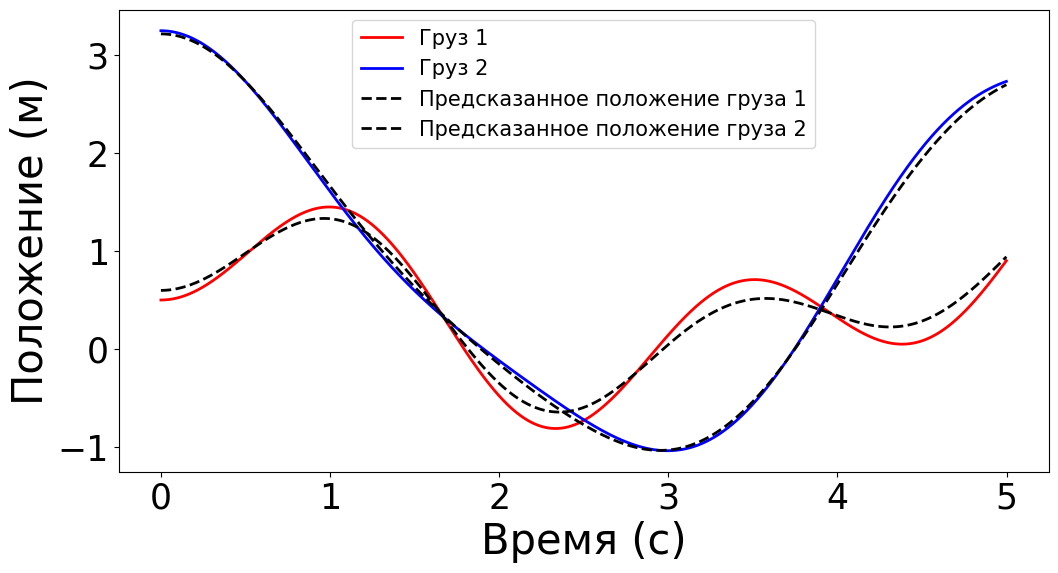

In [8]:
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Массы грузов
m1 = 1.0
m2 = 1.0
# Жестоскти пружин
k1 = 5.0
k2 = 2.0
# Длина пружин
L1 = 0.5
L2 = 0.5

# Первоначальные условия
# d1_0 и d2_0 — начальные перемещения; v1_0 и v2_0 — начальные скорости
d1_0 = 0.5
d2_0 = 3.25

v1_0 = 0.0
v2_0 = 0.0

b1 = 0
b2 = 0

# Максимальное время для симуляции
t_max = 5


def dy(t, x):
    return dde.grad.jacobian(x, t)


def pde(t, x):
    # Расположение масс
    x_1 = x[:, 0:1]
    x_2 = x[:, 1:2]

    dx1_tt = dde.grad.hessian(x, t, i=0, j=0, component=0)
    dx2_tt = dde.grad.hessian(x, t, i=0, j=0, component=1)

    pde1 = m1 * dx1_tt + k1 * (x_1 - L1) - k2 * (x_2 - x_1 - L1)
    pde2 = m2 * dx2_tt + k2 * (x_2 - x_1 - L1)

    return [pde1, pde2]


def boundary_init(t, on_boundary):
    return on_boundary and np.isclose(t[0], 0)


geom = dde.geometry.Interval(0, t_max)

init_d1 = dde.icbc.PointSetBC(
    np.array([0]), np.array([d1_0]).reshape(-1, 1), component=0
)
init_d2 = dde.icbc.PointSetBC(
    np.array([0]), np.array([d2_0]).reshape(-1, 1), component=1
)
init_v1 = dde.OperatorBC(geom, lambda x, y, _: dy(x, y[:, 0:1]), boundary_init)
init_v2 = dde.OperatorBC(geom, lambda x, y, _: dy(x, y[:, 1:2]), boundary_init)


data = dde.data.PDE(
    geom,
    pde,
    [init_d1, init_d2, init_v1, init_v2],
    num_domain=2000,
    num_boundary=100,
    num_test=1000,
)

layer_size = [1] + [20] * 3 + [2]
activation = "tanh"
initializer = "Glorot uniform"

net = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=1e-3)

losshistory, train_state = model.train(epochs=5000)


def vectorfield(w, t, p):
    """
    Определяет дифференциальные уравнения для связанной системы пружина-масса.

    Аргументы:
        w : вектор переменных состояния:
                  w = [x1, y1, x2, y2]
        t :  время
        p :  вектор параметров:
                  p = [m1, m2, k1, k2, L1, L2, b1, b2]
    """
    x1, y1, x2, y2 = w
    m1, m2, k1, k2, L1, L2, b1, b2 = p

    # Уравнение состояния 
    f = [
        y1,
        (-b1 * y1 - k1 * (x1 - L1) + k2 * (x2 - x1 - L2)) / m1,
        y2,
        (-b2 * y2 - k2 * (x2 - x1 - L2)) / m2,
    ]
    return f


# Используем ODEINT для решения дифференциальных уравнений, определенных векторным полем.

# Параметры ODE
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = t_max
numpoints = 250


# Создаём случайные временные выборки
t = geom.random_points(5000)

t[:, 0].sort()

# Задаём параметры и начальные условия:
p = [m1, m2, k1, k2, L1, L2, b1, b2]
w0 = [d1_0, v1_0, d2_0, v2_0]

# Решаем уравнение
wsol = odeint(vectorfield, w0, t[:, 0], args=(p,), atol=abserr, rtol=relerr)

result = model.predict(t)

usol1 = np.array(result[:, 0])
usol2 = np.array(result[:, 1])


lw = 2
plt.figure(figsize=(12, 6))
plt.plot(t, wsol[:, 0], alpha=1, label="Груз 1", c="r", lw=lw)
plt.plot(t, wsol[:, 2], alpha=1, label="Груз 2", c="b", lw=lw)
plt.plot(
    t[:, 0], usol1, alpha=1, label="Предсказанное положение груза 1", linestyle="dashed", c="k", lw=lw
)
plt.plot(
    t[:, 0], usol2, alpha=1, label="Предсказанное положение груза 2", linestyle="dashed", c="k", lw=lw
)
plt.legend(fontsize=15)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Время (с)", fontsize=30)
plt.ylabel("Положение (м)", fontsize=30)
plt.show()
